# <center>Lead Scoring Case Study</center>

 ## Importing Libraries and Data

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing dataset to csv

leadscore_df=pd.read_csv("Leads.csv")

In [3]:
# Head of our dataset
leadscore_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#Checking the dimesions of the dataframe
leadscore_df.shape

(9240, 37)

In [5]:
# Verifying Statistical aspects of the dataframe
leadscore_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#Checking out info of each column
leadscore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#checking for duplicates
sum(leadscore_df.duplicated(subset = 'Prospect ID')) == 0

True

In [8]:
#checking for duplicates
sum(leadscore_df.duplicated(subset = 'Lead Number')) == 0

True

## Data cleaning

In [9]:
#Drop Lead Number and Prospect ID since they have all unique values

leadscore_df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [10]:
#Replace'Select' values with Nan
leadscore_df=leadscore_df.replace("Select", np.nan)

In [11]:
#Check for count of missing values in each column
leadscore_df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [12]:
#check percentage of null values in each column

round(100*(leadscore_df.isnull().sum()/len(leadscore_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [13]:
#Drop all the columns with more than 45% missing values
cols=leadscore_df.columns

for i in cols:
    if((100*(leadscore_df[i].isnull().sum()/len(leadscore_df.index))) >= 45):
        leadscore_df.drop(i, 1, inplace = True)

In [14]:
#check  percentage of null values in each column after dropping columns with more than 45% missing values

round(100*(leadscore_df.isnull().sum()/len(leadscore_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

### Dealing with missing values

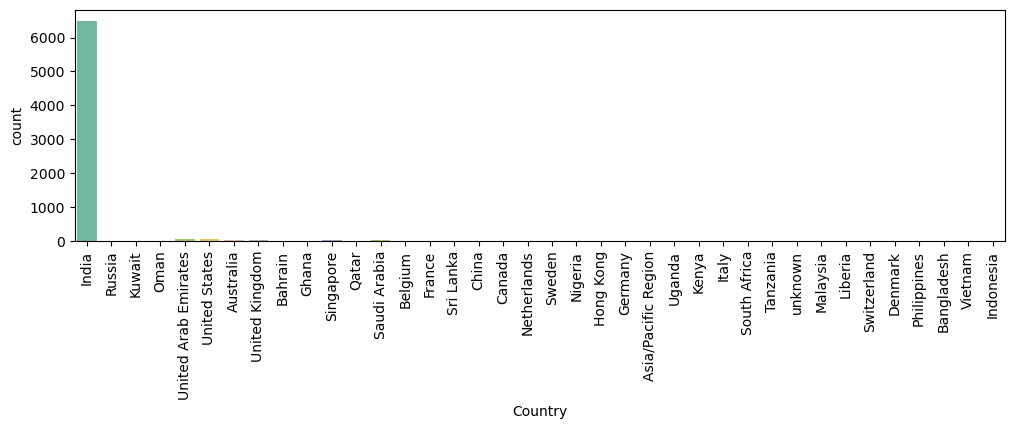

In [15]:
# Column 'country' with 26.63% missing values
colors = sns.color_palette("Set2")

# Create the countplot
plt.figure(figsize=(12, 3))
sns.countplot(x=leadscore_df['Country'], data=leadscore_df, palette=colors)
plt.xticks(rotation=90)
plt.show()

Since the column is skewed towards 'India', we can impute the missing values with India.

In [16]:
leadscore_df['Country']=leadscore_df['Country'].replace(np.nan,'India')

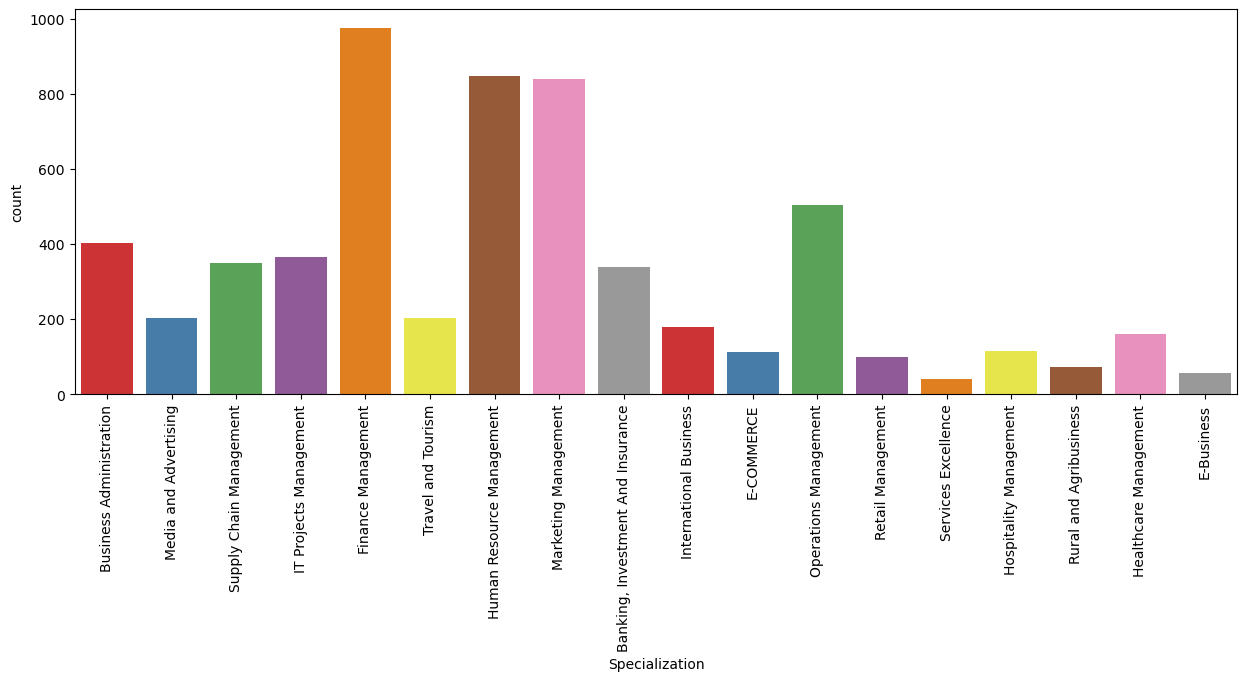

In [17]:
# Column 'Specialization' with 36.58% missing values
colors = sns.color_palette("Set1")

# Create the countplot
plt.figure(figsize=(15, 5))
sns.countplot(x=leadscore_df['Specialization'], data=leadscore_df, palette=colors)
plt.xticks(rotation=90)
plt.show()

The data is not highy skewed towards any particular specilisation. Hence we can add a category called 'Others' for the missing values

In [18]:
leadscore_df['Specialization'] = leadscore_df['Specialization'].replace(np.nan, 'Others')

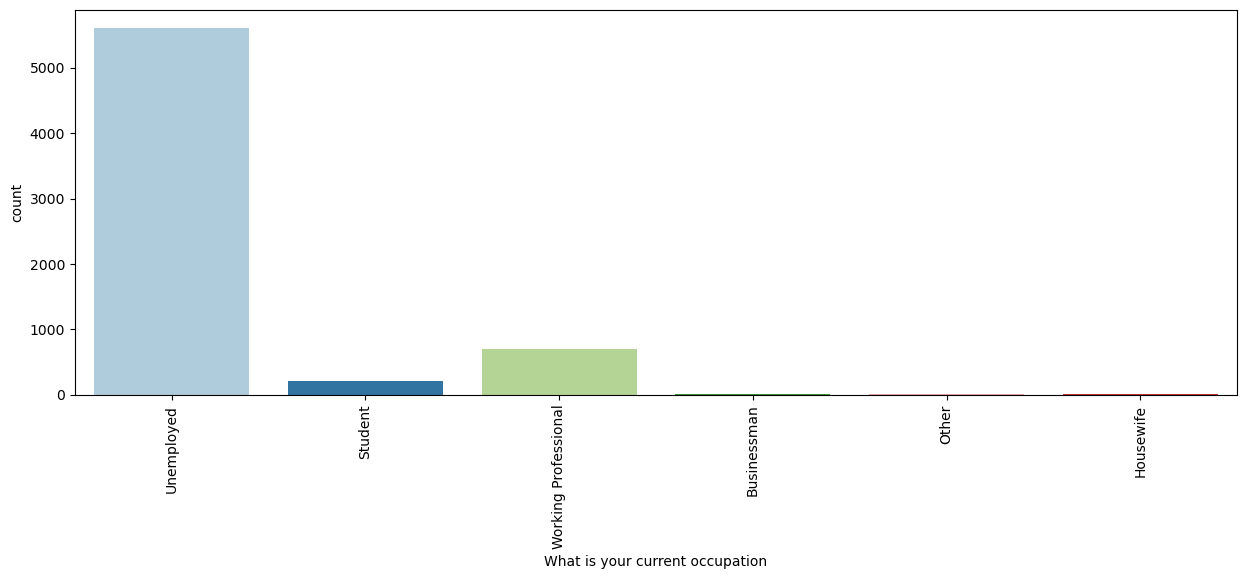

In [19]:
# Column 'What is your current occupation' with 29.11% missing values
colors = sns.color_palette("Paired")

# Create the countplot
plt.figure(figsize=(15, 5))
sns.countplot(x=leadscore_df['What is your current occupation'], data=leadscore_df, palette=colors)
plt.xticks(rotation=90)
plt.show()

Since the column is skewed towards 'Unemployed', we can impute the missing values with 'Unemployed'.

In [20]:
leadscore_df['What is your current occupation'] = leadscore_df['What is your current occupation'].replace(np.nan, 'Unemployed')

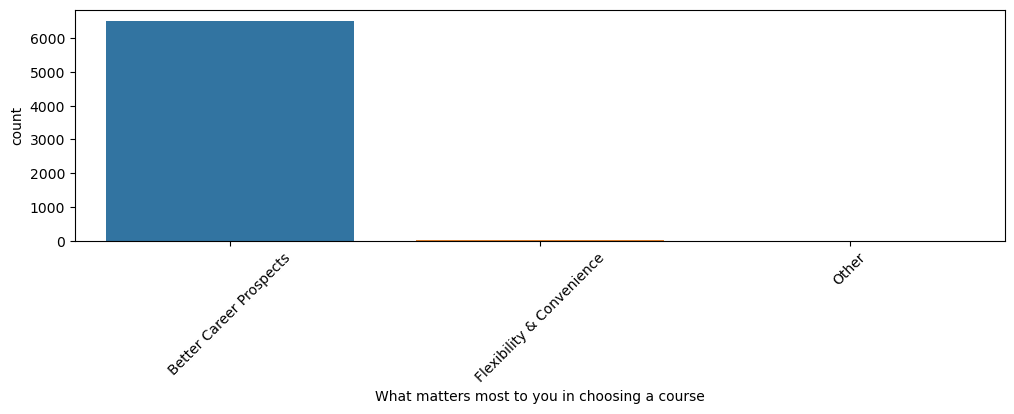

In [21]:
# Column 'What matters most to you in choosing a course' with 29.32% missing values
plt.figure(figsize=(12,3))
sns.countplot(x = leadscore_df['What matters most to you in choosing a course'], data = leadscore_df)
plt.xticks(rotation=45)
plt.show()


Since this column is highly skewed towards 'Better Career Prospects' no meaningful insights can be drawn from it. Hence it can be dropped.

In [22]:
leadscore_df=leadscore_df.drop('What matters most to you in choosing a course',axis=1)

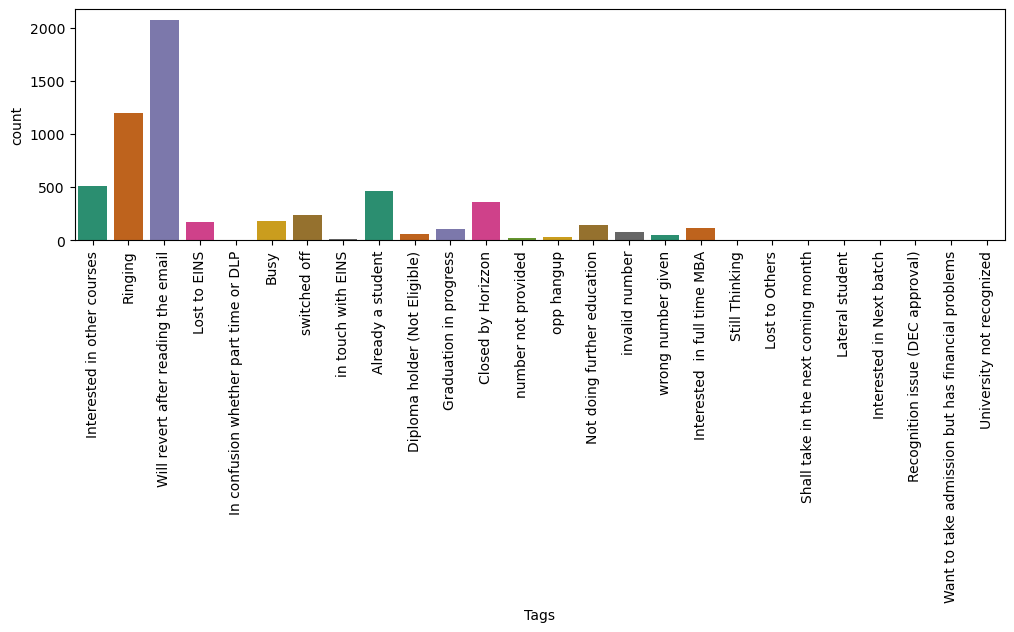

In [23]:
# Column 'Tags' with 36.29% missing values
colors = sns.color_palette("Dark2")

# Create the countplot
plt.figure(figsize=(12, 3))
sns.countplot(x=leadscore_df['Tags'], data=leadscore_df, palette=colors)
plt.xticks(rotation=90)
plt.show()

 We can impute the missing values Since the column is skewed towards 'Will revert after reading the email', with the same.

In [24]:
leadscore_df['Tags'] = leadscore_df['Tags'].replace(np.nan, 'Will revert after reading the email')

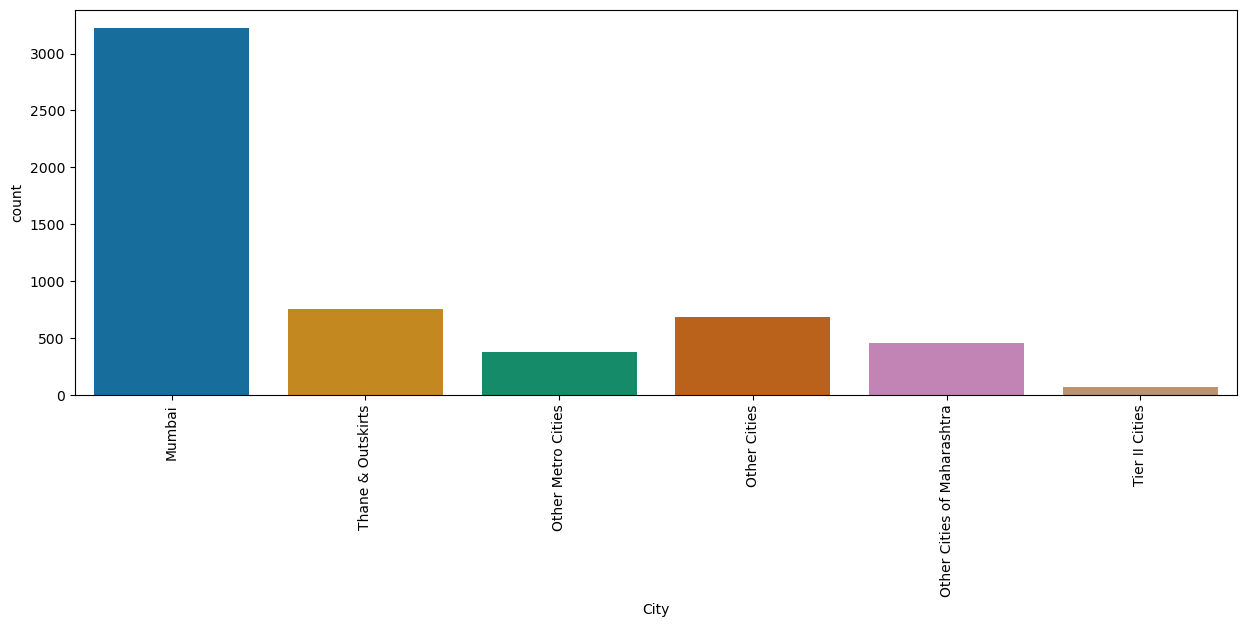

In [25]:
# Column 'City' with 39.71% missing values
colors = sns.color_palette("colorblind")

# Create the countplot
plt.figure(figsize=(15, 5))
sns.countplot(x=leadscore_df['City'], data=leadscore_df, palette=colors)
plt.xticks(rotation=90)
plt.show()

we can impute the missing values Since the column is skewed towards 'Mumbai',  with the same.

In [26]:
leadscore_df['City'] = leadscore_df['City'].replace(np.nan, 'Mumbai')

In [27]:
# Null percentages after removing the above columnsdealing with missing values
round(leadscore_df.isnull().sum()/len(leadscore_df.index),2)*100

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                    

In [28]:
# Drop the Columns with null values (As they are only 1%)
leadscore_df.dropna(inplace = True)

In [29]:
round(leadscore_df.isnull().sum()/len(leadscore_df.index),2)*100

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                    

### Exploratory Data Analysis

## Dealing with categorical variable

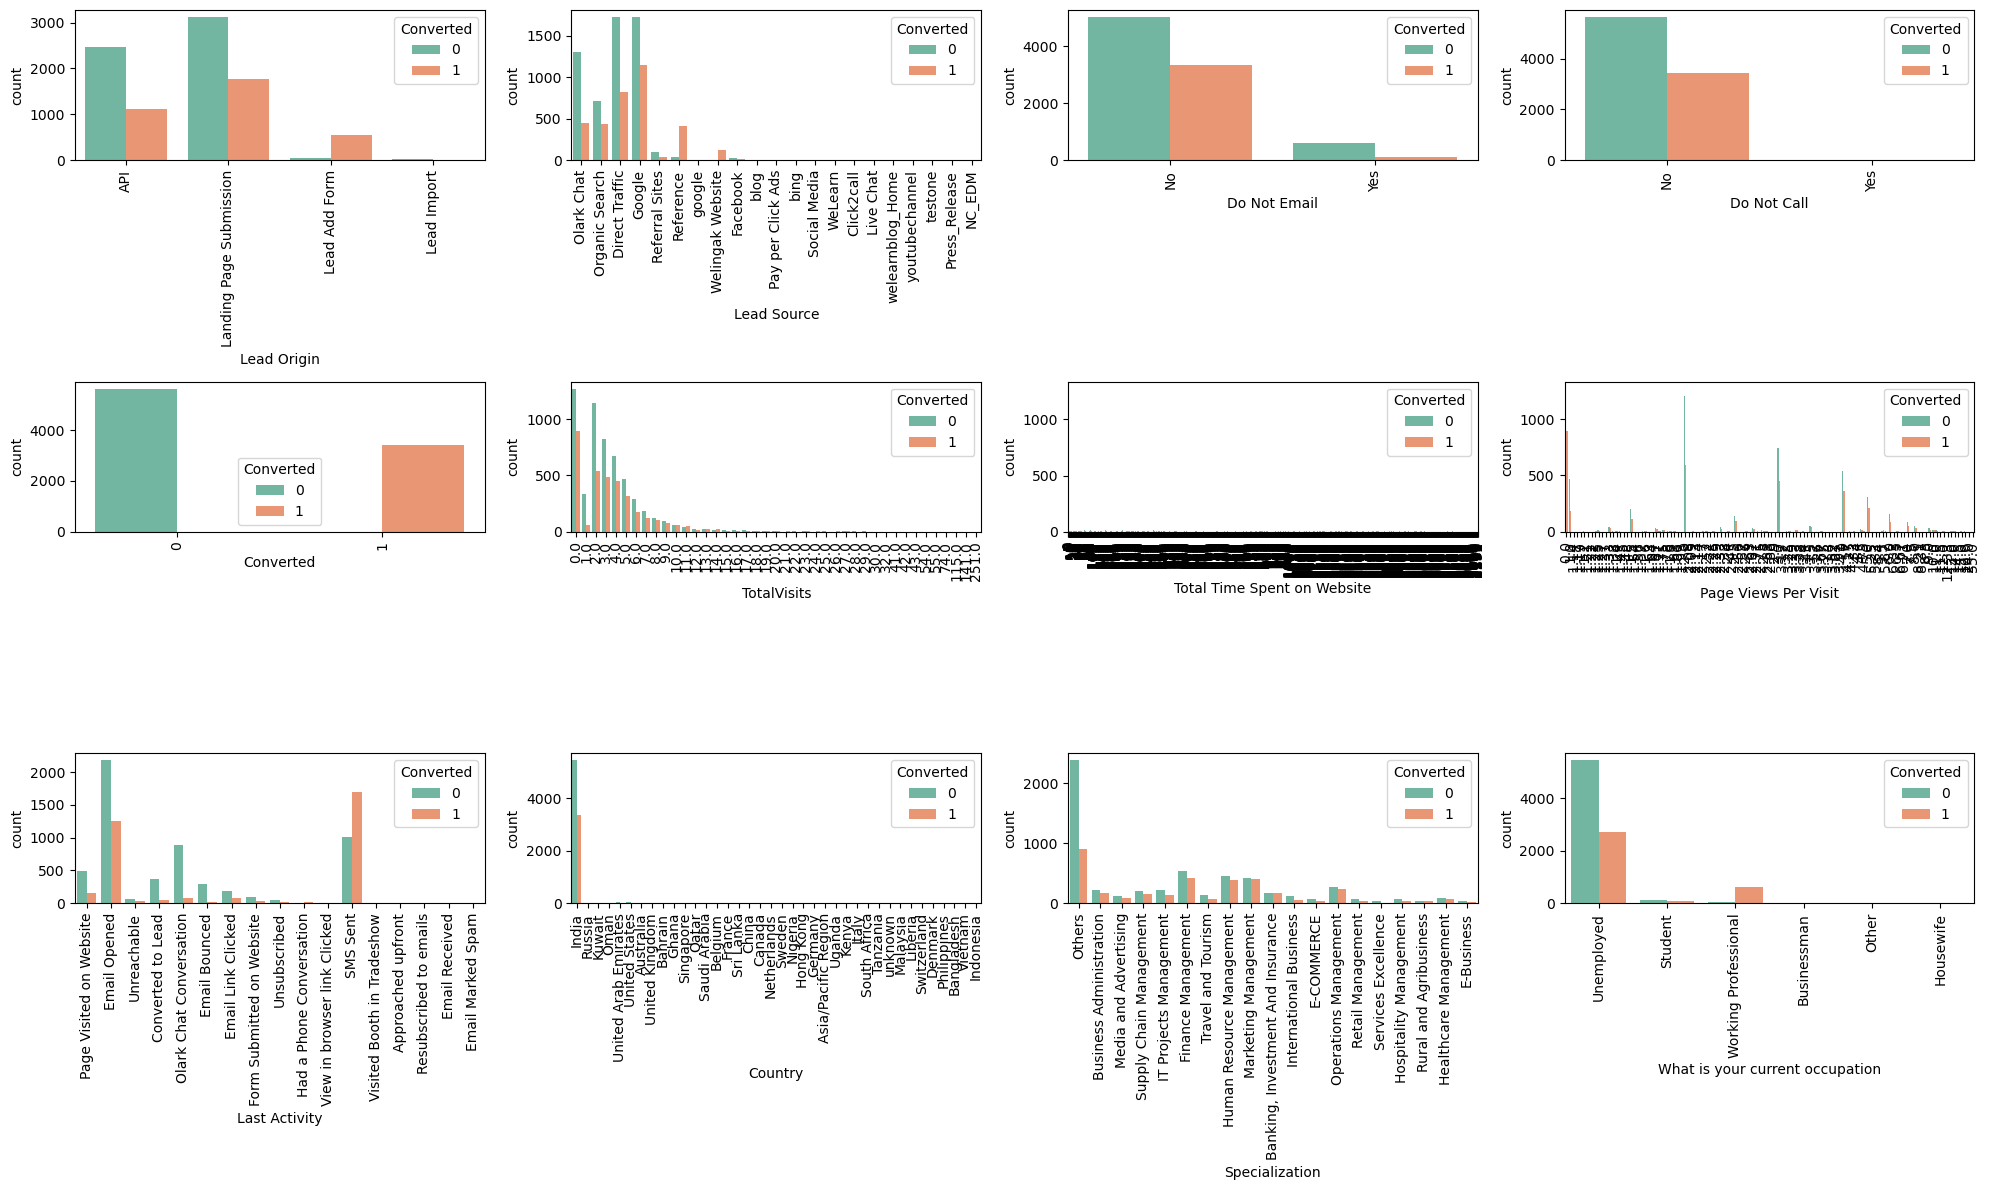

In [30]:
# Create a figure and axes
# Create a figure and axes
fig, axs = plt.subplots(3, 4, figsize=(20, 12))

# Define a custom color palette
custom_palette = sns.color_palette("Set2")

# Plot the countplots
for i in range(3):
    for j in range(4):
        sns.countplot(
            x=leadscore_df.columns[i * 4 + j],
            hue="Converted",
            data=leadscore_df,
            ax=axs[i, j],
            palette=custom_palette,  # Use the custom color palette
        )
        axs[i, j].set_xticklabels(axs[i, j].get_xticklabels(), rotation=90)  # Rotate x-axis labels

# Show the plot
plt.tight_layout()
plt.show()

In [31]:
#creating a list of columns to be dropped

Dropping_col=(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview'])

In [32]:
#checking value counts of Lead Source column

leadscore_df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [33]:
#replacing Nan Value with Google
leadscore_df['Lead Source'] = leadscore_df['Lead Source'].replace(np.nan,'Google')

#'Lead Source' is having same label name 'Google' but in different format i.e 'google', So converting google to Google
leadscore_df['Lead Source'] = leadscore_df['Lead Source'].replace('google','Google')

In [34]:
#combining low frequency values to Others

leadscore_df['Lead Source'] = leadscore_df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat'] ,'Others')

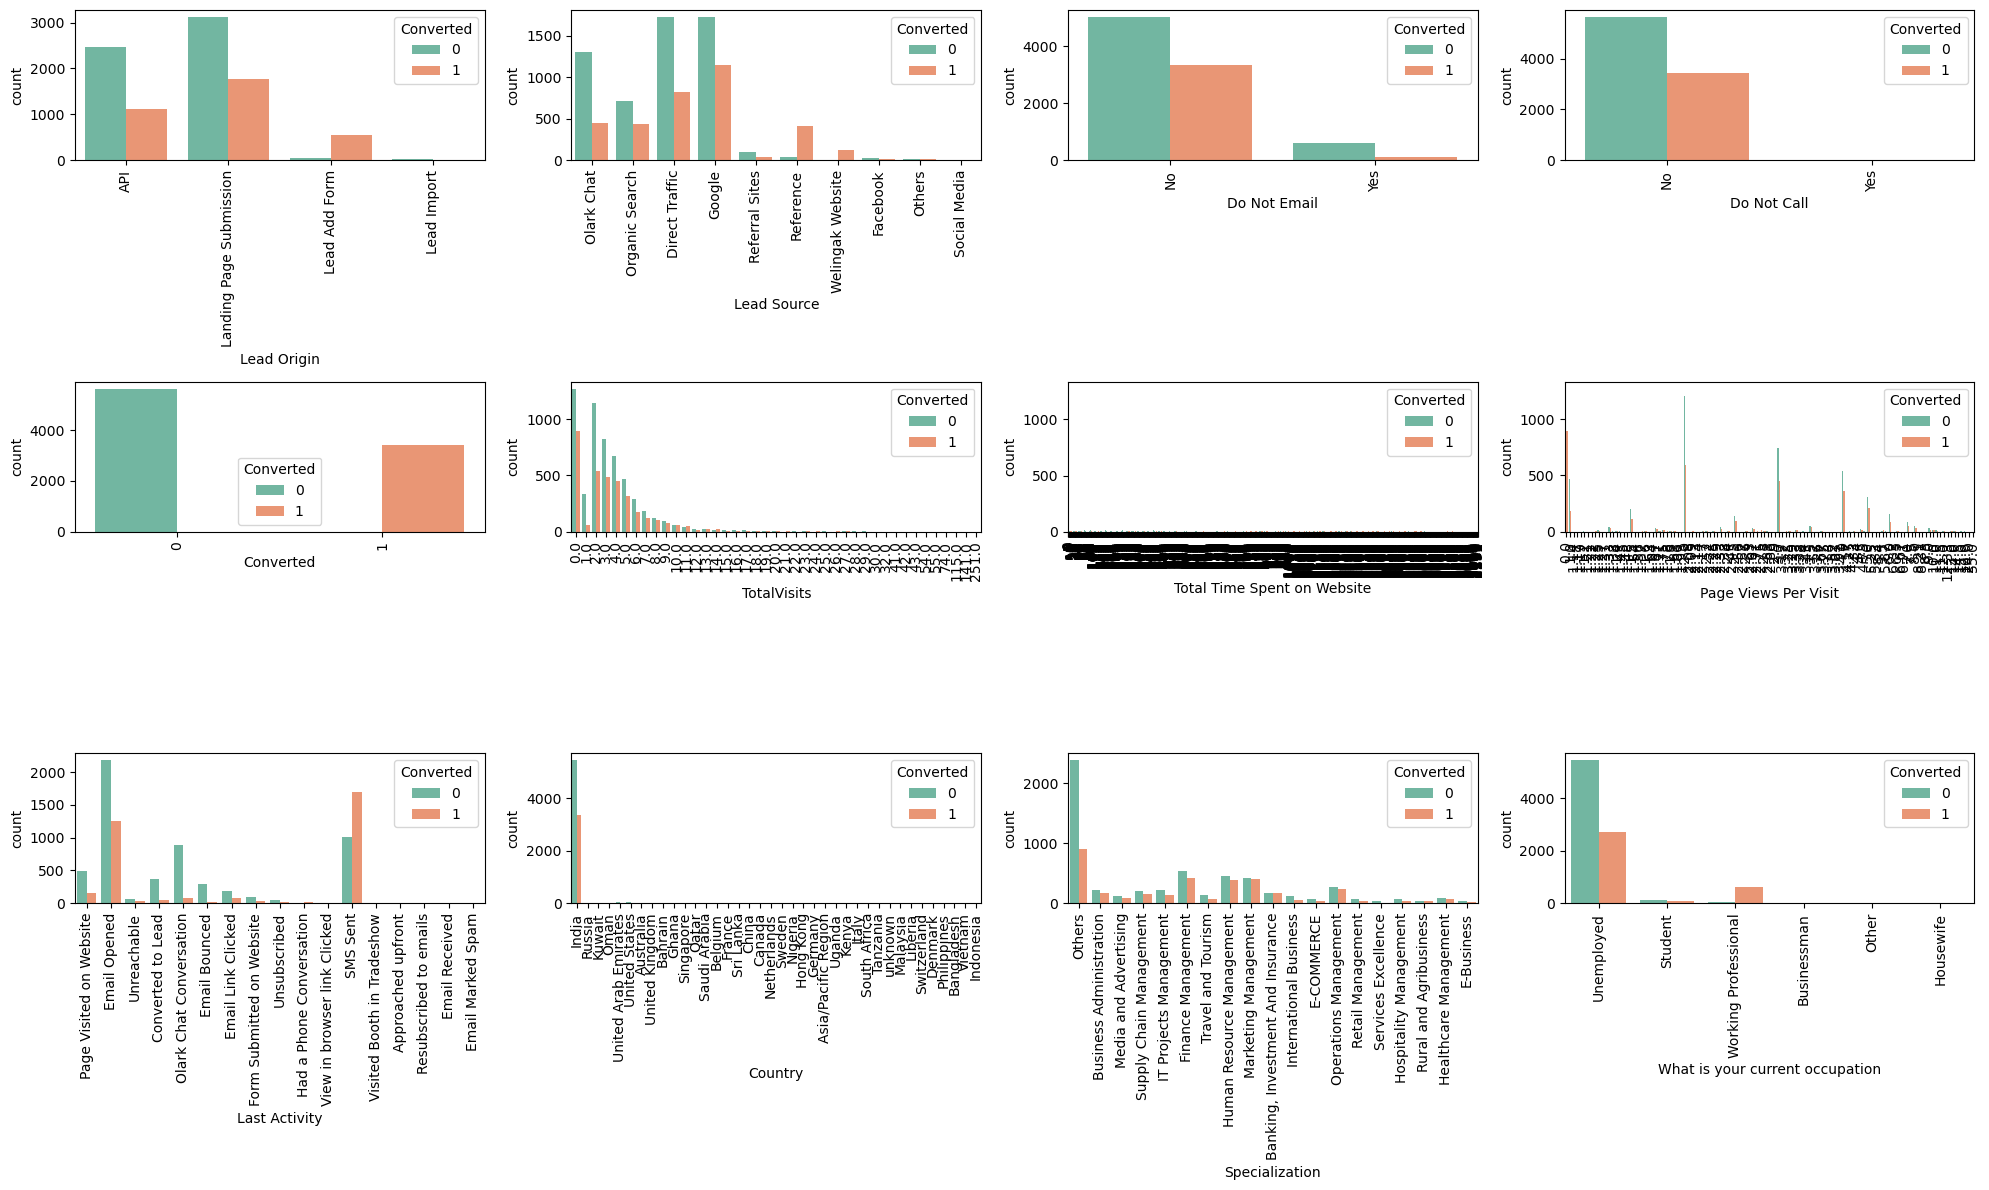

In [35]:
# Create a figure and axes
fig, axs = plt.subplots(3, 4, figsize=(20, 12))

# Define a custom color palette
custom_palette = sns.color_palette("Set2")

# Plot the countplots
for i in range(3):
    for j in range(4):
        sns.countplot(
            x=leadscore_df.columns[i * 4 + j],
            hue="Converted",
            data=leadscore_df,
            ax=axs[i, j],
            palette=custom_palette,  # Use the custom color palette
        )
        axs[i, j].set_xticklabels(axs[i, j].get_xticklabels(), rotation=90)  # Rotate x-axis labels

# Show the plot
plt.tight_layout()
plt.show()

In [36]:
#checking value counts of Country column

leadscore_df['Country'].value_counts(dropna=False)

India                   8787
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

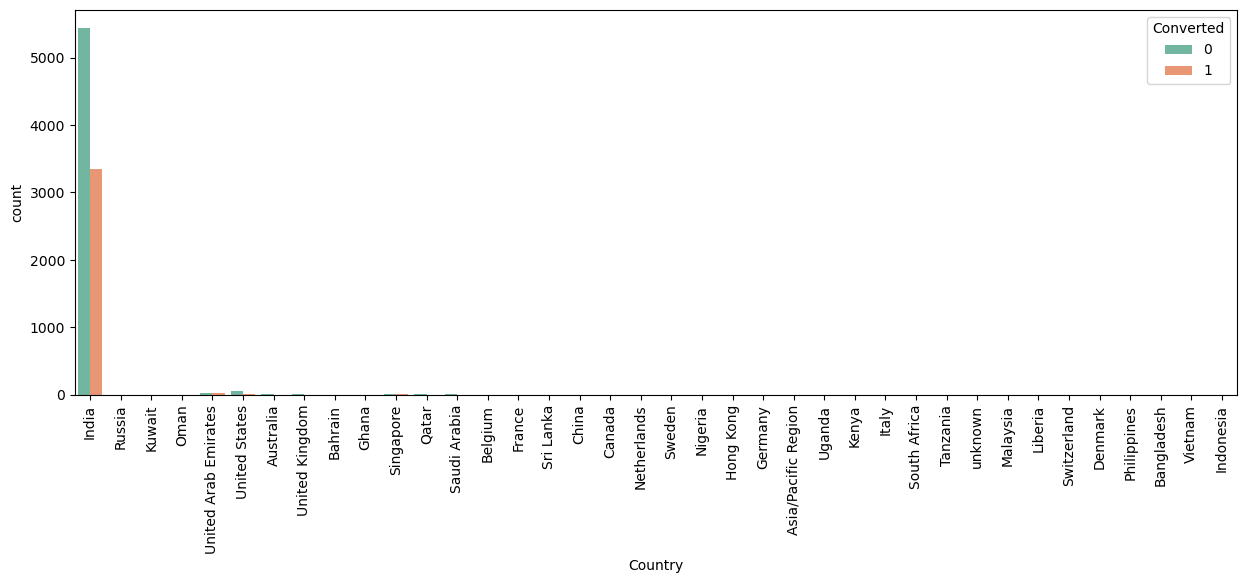

In [37]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the countplot
sns.countplot(x='Country', hue='Converted', data=leadscore_df, palette='Set2', ax=ax)

# Set the xticklabels rotation
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Show the plot
plt.show()

In [38]:
#creating a list of columns to be droppped

Dropping_col.append('Country')

#checking out list of columns to be dropped
Dropping_col

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country']

In [39]:
#checking value counts of 'What is your current occupation' column
leadscore_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

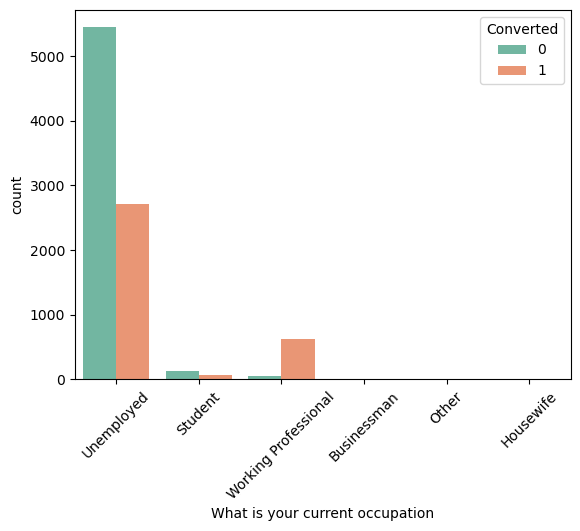

In [40]:
# Plot the countplot

colors1 = sns.countplot(x='What is your current occupation', hue='Converted', data=leadscore_df, palette='Set2')

# Set the xticklabels rotation
colors1.set_xticklabels(colors1.get_xticklabels(), rotation=45)

# Show the plot
plt.show()

In [41]:
#checking value counts of Last Activity
leadscore_df['Last Activity'].value_counts(dropna=False)

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

### replacing Nan Values with mode value "Email Opened"

In [42]:


leadscore_df['Last Activity'] = leadscore_df['Last Activity'].replace(np.nan,'Email Opened')

### visualizing count of Last Activity Variable


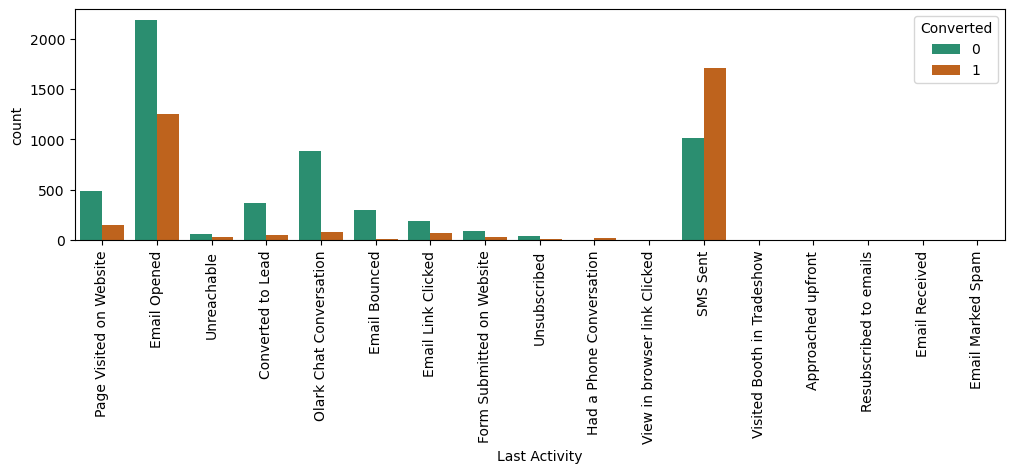

In [43]:

plt.figure(figsize=(12,3))
s1=sns.countplot(x='Last Activity', hue='Converted' , data = leadscore_df , palette = 'Dark2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [44]:
# Appending  'Last Activity' to the Dropping_col List it is a X-education's sales team generated data
Dropping_col.append('Last Activity')

#check updated list for columns to be dropped
Dropping_col

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'Last Activity']

In [45]:
#Checking  the Null Values in All Columns after imputation:
round(100*(leadscore_df.isnull().sum()/len(leadscore_df.index)), 2)

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                    

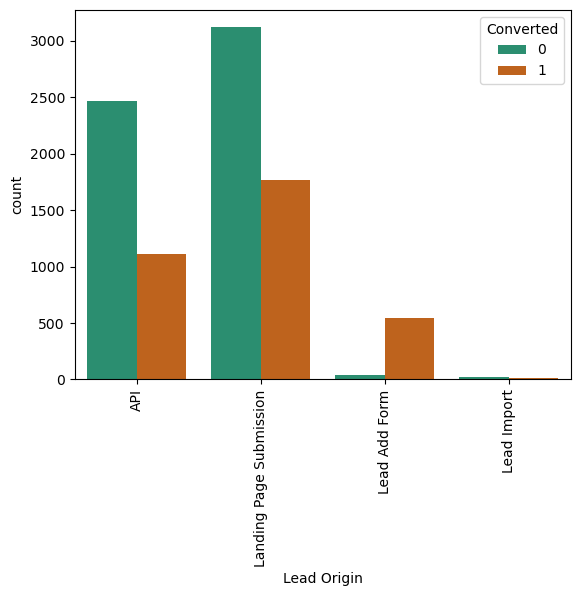

In [46]:
s1=sns.countplot(x='Lead Origin', hue='Converted' , data = leadscore_df , palette = 'Dark2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

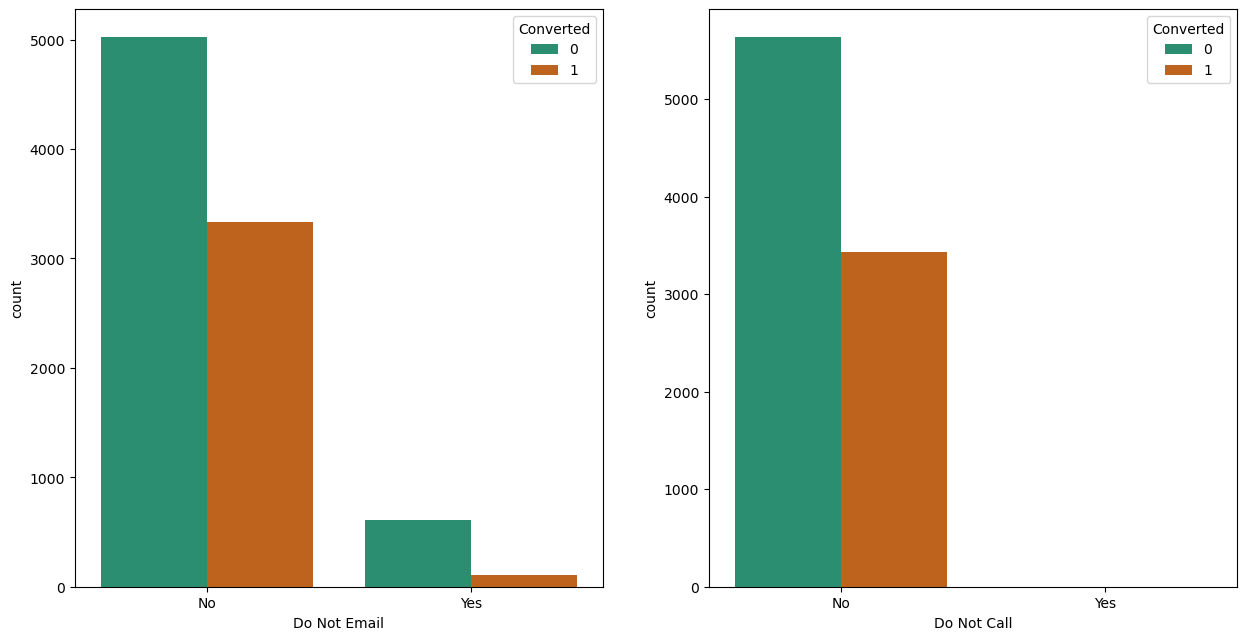

In [47]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = leadscore_df, ax = axs[0],palette = 'Dark2')
sns.countplot(x = "Do Not Call", hue = "Converted", data = leadscore_df, ax = axs[1],palette = 'Dark2')
plt.show()

In [48]:
# Appending 'Do Not Call' to the Dropping_col List
Dropping_col.append('Do Not Call')

#check updated list for columns to be dropped
Dropping_col

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'Last Activity',
 'Do Not Call']

In [49]:
#check value counts of last Notable Activity
leadscore_df['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

### clubbing lower frequency values

In [50]:


leadscore_df['Last Notable Activity'] = leadscore_df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Others')

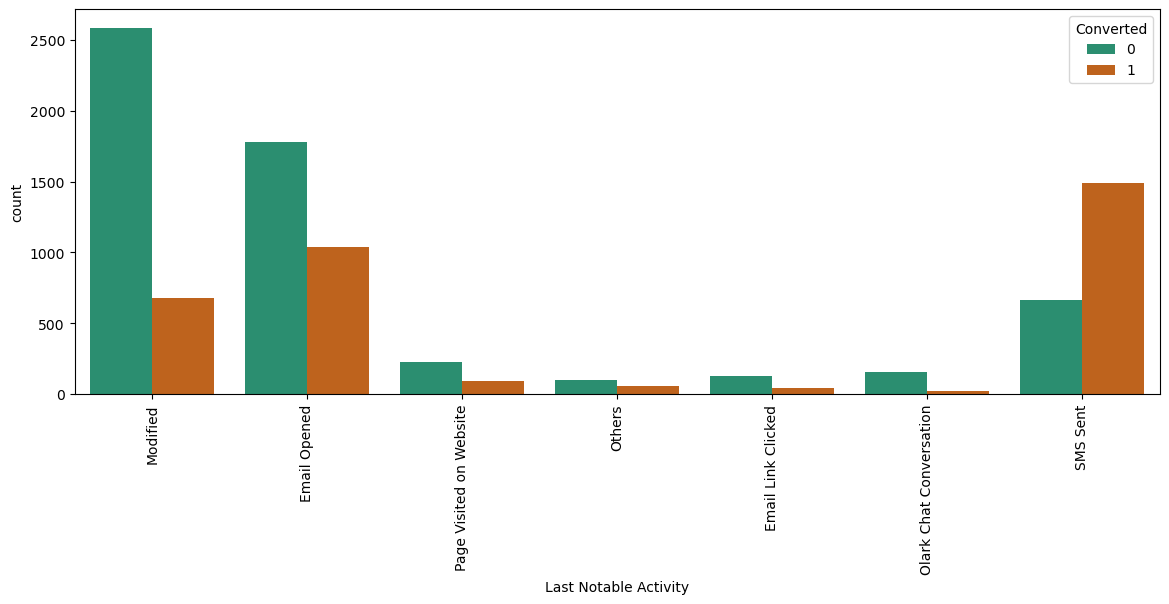

In [51]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leadscore_df , palette = 'Dark2')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [52]:
# Appending g'Last Notable Activity'to the Dropping_col List as this is a sales team generated data
Dropping_col.append('Last Notable Activity')

In [53]:
# check final list of columns to be dropped
Dropping_col

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'Last Activity',
 'Do Not Call',
 'Last Notable Activity']

In [54]:
#drop columns
leads = leadscore_df.drop(Dropping_col,1)

#check info of dataset for remaining columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9074 non-null   object 
 1   Lead Source                      9074 non-null   object 
 2   Do Not Email                     9074 non-null   object 
 3   Converted                        9074 non-null   int64  
 4   TotalVisits                      9074 non-null   float64
 5   Total Time Spent on Website      9074 non-null   int64  
 6   Page Views Per Visit             9074 non-null   float64
 7   Specialization                   9074 non-null   object 
 8   What is your current occupation  9074 non-null   object 
 9   Tags                             9074 non-null   object 
 10  City                             9074 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 850.7+ KB


In [55]:
#check dataset
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Tags,City
0,API,Olark Chat,No,0,0.0,0,0.0,Others,Unemployed,Interested in other courses,Mumbai
1,API,Organic Search,No,0,5.0,674,2.5,Others,Unemployed,Ringing,Mumbai
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Business Administration,Student,Will revert after reading the email,Mumbai
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Media and Advertising,Unemployed,Ringing,Mumbai
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Others,Unemployed,Will revert after reading the email,Mumbai


## Univariate & Bivariate analysis

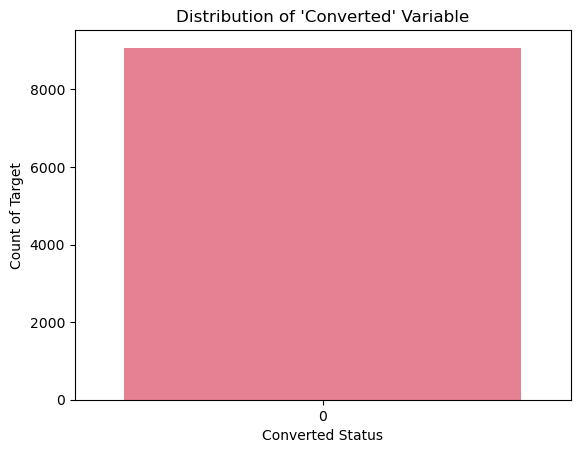

In [56]:
# Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).
# Visualizing Distribution of 'Converted' Variable
sns.countplot(leads.Converted, palette="husl")  # You can replace "husl" with any other Seaborn palette
plt.xlabel("Converted Status")
plt.ylabel("Count of Target")
plt.title("Distribution of 'Converted' Variable")
plt.show()

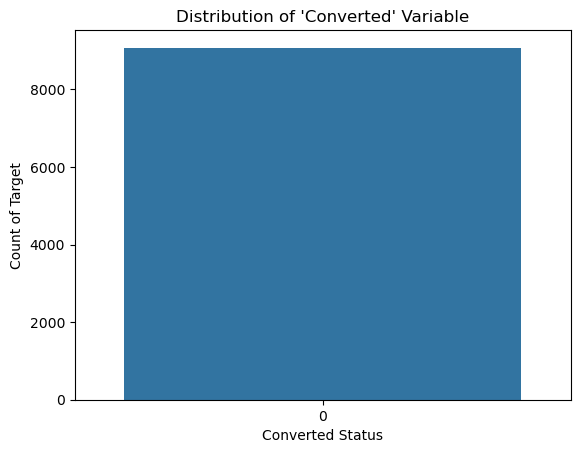

In [57]:
#Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).
#Visualizing Distribution of 'Converted' Variable
sns.countplot(leads.Converted)
plt.xlabel("Converted Status")
plt.ylabel("Count of Target")
plt.title("Distribution of 'Converted' Variable")
plt.show()

In [58]:
# Finding out conversion rate
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

37.85541106458012

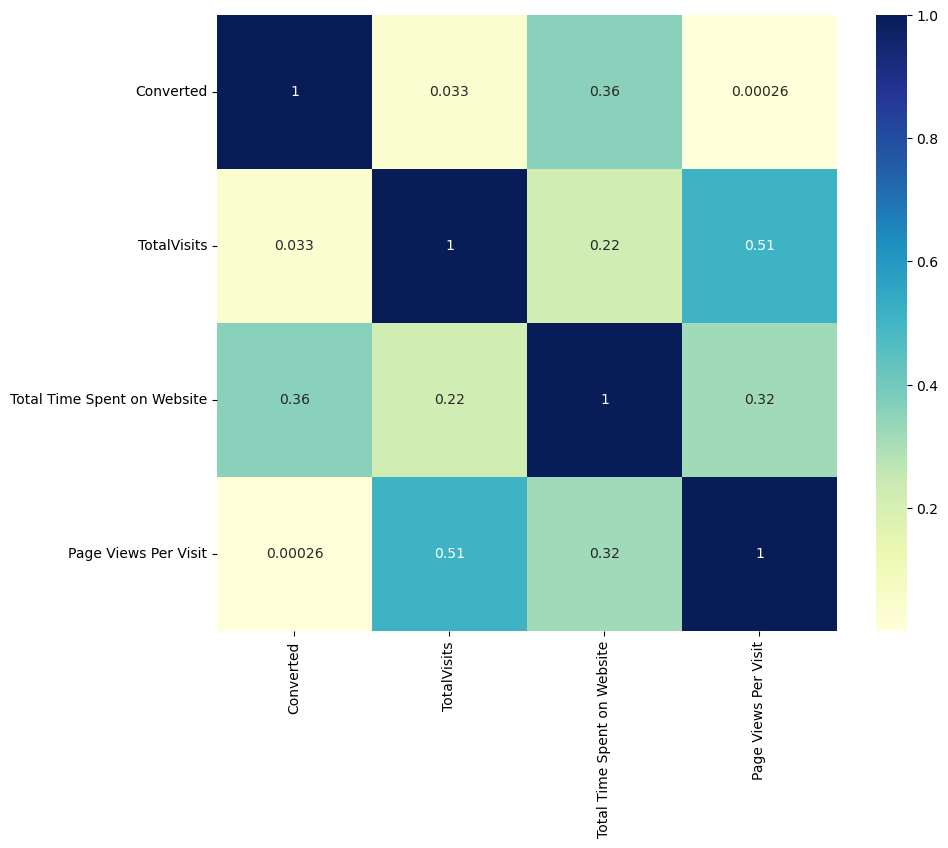

In [59]:
#Checking correlations of numeric values using heatmap

# Size of the figure

plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(leads.corr(), cmap="YlGnBu", annot=True)

plt.show()

## visualizing spread of variable Total Visits

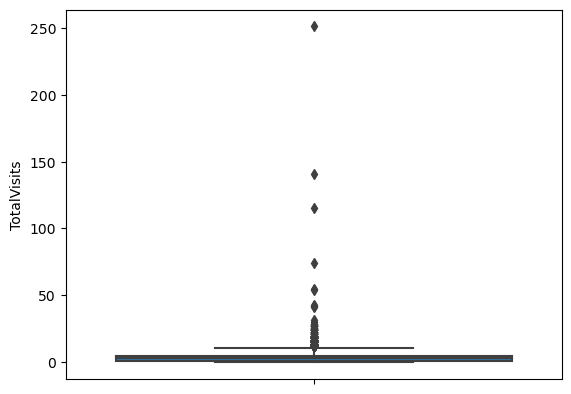

In [60]:
sns.boxplot(y=leads['TotalVisits'])
plt.show()

### checking percentile values for "Total Visits"

In [61]:

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

### Outlier Treatment: capping the outliers to 95% value for analysis


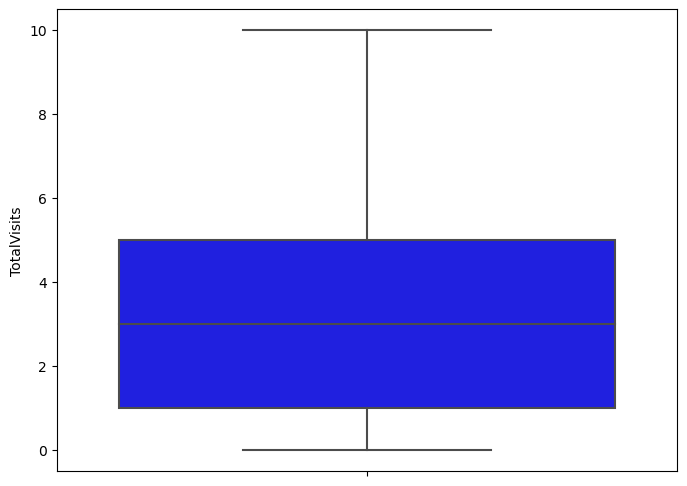

In [62]:

percentiles = leads['TotalVisits'].quantile([0.05, 0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

# Visualize the variable after outlier treatment with a blue boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=leads['TotalVisits'], color='blue')
plt.show()


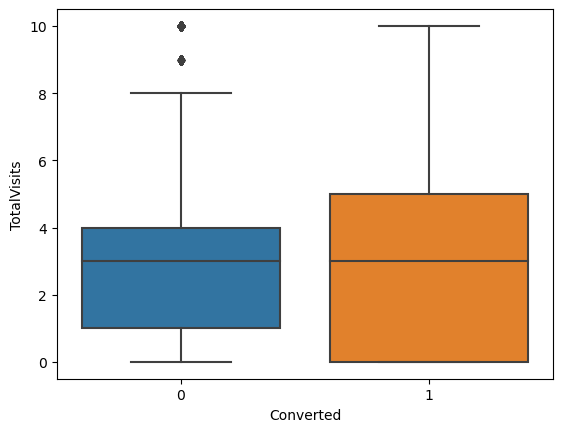

In [63]:
# Visualizing TotalVisits w.r.t Target Variable 'Converted'
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()



### Visualizing TotalVisits w.r.t Target Variable 'Converted'

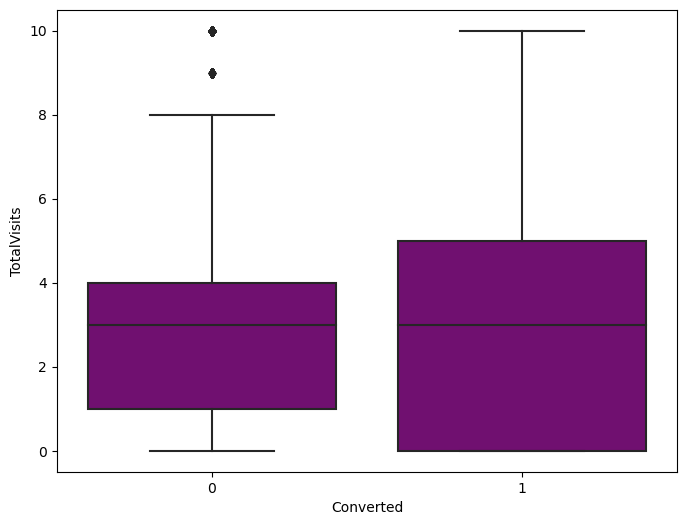

In [64]:
# Create the boxplot with a specific color
plt.figure(figsize=(8, 6))
sns.boxplot(y='TotalVisits', x='Converted', data=leads, color='purple')
plt.show()

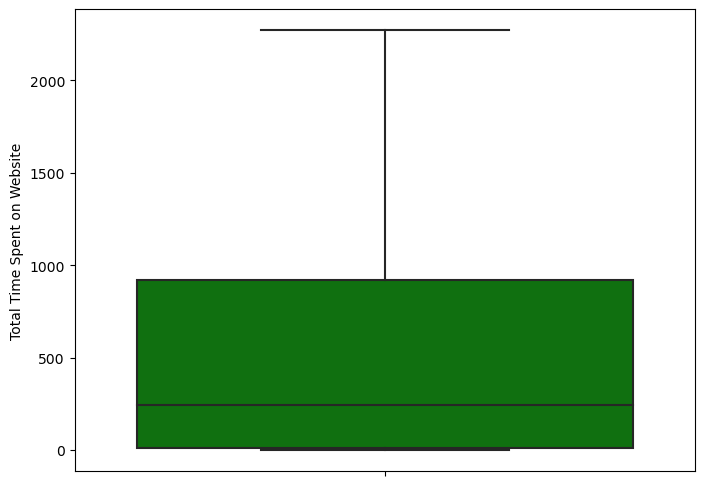

In [65]:
#visualizing spread of variable 'Total Time Spent on Website'
plt.figure(figsize=(8, 6))
sns.boxplot(y=leads['Total Time Spent on Website'], color='green')
plt.show()

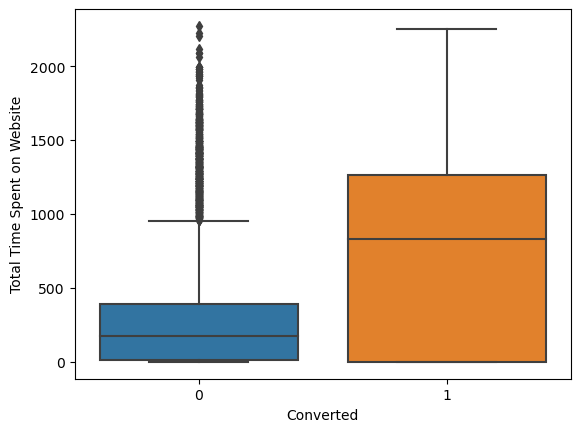

In [66]:
# Visualizing 'Total Time Spent on Website' w.r.t Target Variable 'converted'
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)
plt.show()


In [67]:
leads['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

### visualizing spread of variable 'Page Views Per Visit'

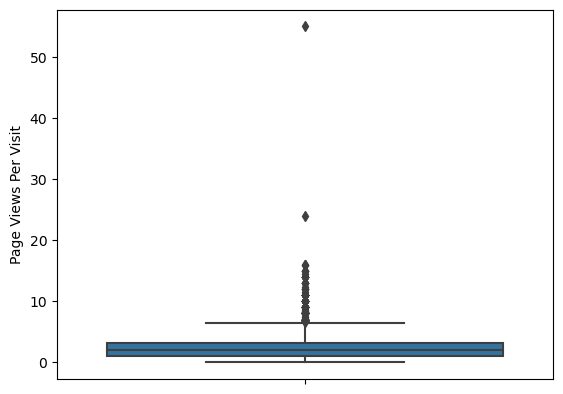

In [68]:
sns.boxplot(y =leads['Page Views Per Visit'])
plt.show()

### Outlier Treatment: capping the outliers to 95% value for analysis

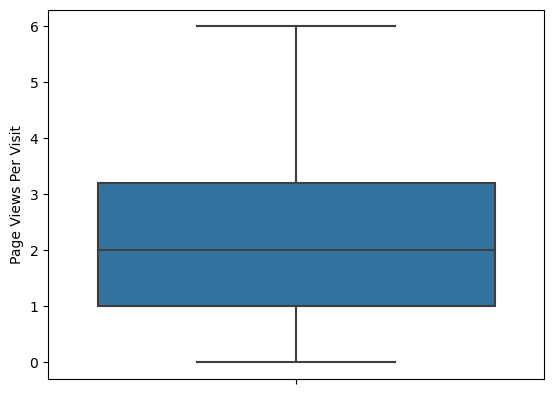

In [69]:

percentiles = leads['Page Views Per Visit'].quantile([0.05,0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

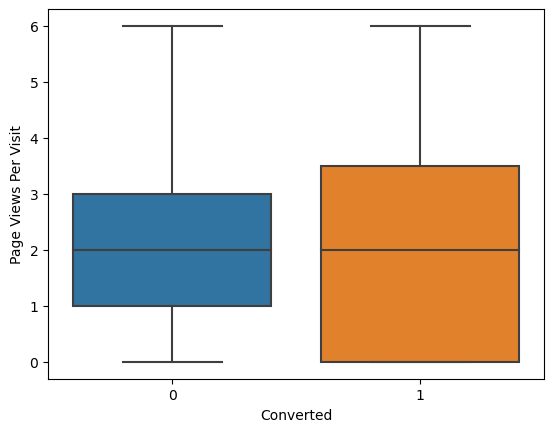

In [70]:
#visualizing 'Page Views Per Visit' w.r.t Target variable 'Converted'
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)
plt.show()

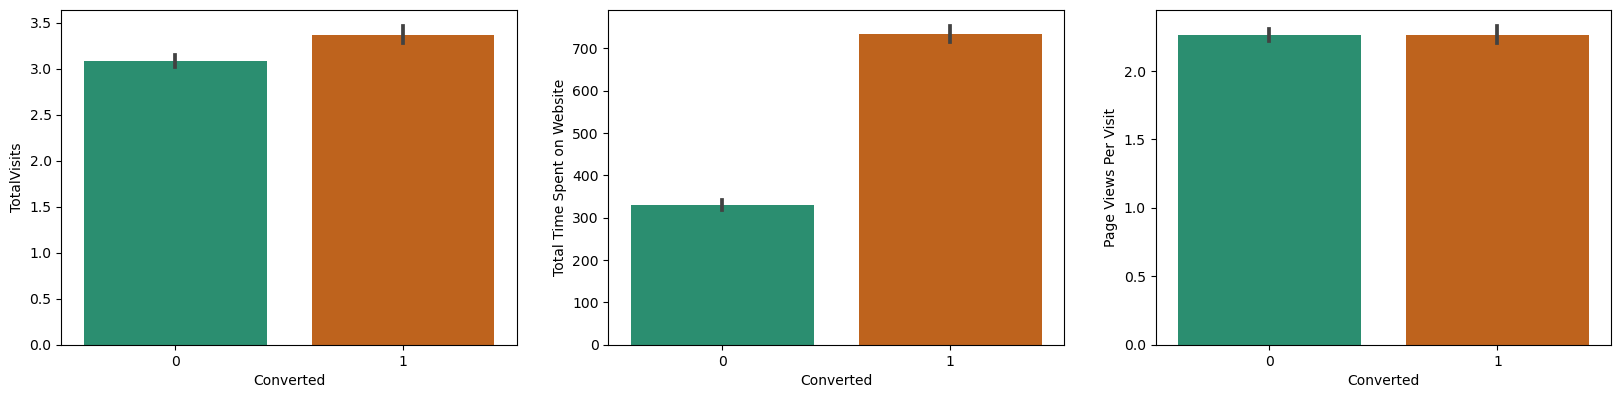

In [71]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Dark2', data = leads)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Dark2', data = leads)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Dark2', data = leads)
plt.show()

## Data Prparation 

In [72]:
# List of variables to map

In [73]:


varlist =  ['Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [74]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Tags,City
0,API,Olark Chat,0,0,0.0,0,0.0,Others,Unemployed,Interested in other courses,Mumbai
1,API,Organic Search,0,0,5.0,674,2.5,Others,Unemployed,Ringing,Mumbai
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Business Administration,Student,Will revert after reading the email,Mumbai
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Media and Advertising,Unemployed,Ringing,Mumbai
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Others,Unemployed,Will revert after reading the email,Mumbai


In [75]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9074 non-null   object 
 1   Lead Source                      9074 non-null   object 
 2   Do Not Email                     9074 non-null   int64  
 3   Converted                        9074 non-null   int64  
 4   TotalVisits                      9074 non-null   float64
 5   Total Time Spent on Website      9074 non-null   int64  
 6   Page Views Per Visit             9074 non-null   float64
 7   Specialization                   9074 non-null   object 
 8   What is your current occupation  9074 non-null   object 
 9   Tags                             9074 non-null   object 
 10  City                             9074 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 1.1+ MB


In [76]:
#getting a list of categorical columns for creating dummy

cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Specialization',
       'What is your current occupation', 'Tags', 'City'],
      dtype='object')

In [77]:
# Creating a dummy variable for the categorical variables and dropping the first one.
data_dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation', 'Tags', 'City']], drop_first=True)
data_dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
# Concatenating the data_dummy to the leads dataframe
leads = pd.concat([leads, data_dummy], axis=1)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Tags,...,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,API,Olark Chat,0,0,0.0,0,0.0,Others,Unemployed,Interested in other courses,...,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Others,Unemployed,Ringing,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Business Administration,Student,Will revert after reading the email,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Media and Advertising,Unemployed,Ringing,...,0,0,0,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Others,Unemployed,Will revert after reading the email,...,0,0,0,0,0,0,0,0,0,0


In [79]:
# Dropping the columns for which dummies were created
leads = leads.drop(['Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation', 'Tags', 'City'], axis = 1)

In [80]:
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Train-Test data split

### Importing library for splitting dataset

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
# Putting feature variable to X
X=leads.drop('Converted', axis=1)

#checking head of X
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
# Putting response variable to y
y = leads['Converted']

#checking head of y
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

### Splitting the data into train and test

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [85]:
#importing library for feature scaling
from sklearn.preprocessing import StandardScaler

In [86]:
#scaling of features
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

#checking X-train dataset after scaling
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3009,-0.292645,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,3.417111,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,-0.292645,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4750,-0.292645,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7987,-0.292645,0.643547,2.017593,0.122613,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Checking the conversion rate from 'converted' column as it denotes the target variable

In [87]:
(sum(y)/len(y.index))*100

37.85541106458012

### Feature Selection Using RFE

### importing necessary library

In [88]:
import statsmodels.api as sm

In [89]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [90]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=15)
             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [91]:
rfe.support_

array([False, False,  True, False,  True,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True, False, False, False, False,
        True, False,  True,  True,  True, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False])

In [92]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 16),
 ('TotalVisits', False, 51),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 50),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 10),
 ('Lead Source_Facebook', False, 25),
 ('Lead Source_Google', False, 35),
 ('Lead Source_Olark Chat', False, 13),
 ('Lead Source_Organic Search', False, 34),
 ('Lead Source_Others', False, 46),
 ('Lead Source_Reference', False, 3),
 ('Lead Source_Referral Sites', False, 19),
 ('Lead Source_Social Media', False, 36),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 45),
 ('Specialization_E-Business', False, 32),
 ('Specialization_E-COMMERCE', False, 17),
 ('Specialization_Finance Management', False, 43),
 ('Specialization_Healthcare Management', False, 39),
 ('Specialization_Hospitality Management', False, 27),
 ('Specialization_Human Resource Management', False, 40),
 ('Sp

In [93]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Specialization_Others', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_Lost to Others',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS'],
      dtype='object')

In [94]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       

## Model building

### BUILDING MODEL 1


In [95]:

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2077.8
Date:                Tue, 17 Oct 2023   Deviance:                       4155.6
Time:                        01:46:02   Pearson chi2:                 8.46e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4927
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5155      0.337     -4.500      0.000      -2.176      -0.855
Total Time Spent on Website                              1.0731      0.044     24.581      0.000       0.988       1.159
Lead Origin_Landing Page Submission                     -1.5999      0.148    -10.847      0.000      -1.889      -1.311
Lead Origin_Lead Add Form                                3.1374      0.315      9.965      0.000       2.520       3.755
Lead Source_Welingak Website                             1.8486      0.781      2.368      0.018       0.318       3.379
Specialization_Others                                   -1.6328      0.148    -11.024      0.000      -1.923      -1.343
What is your current occupation_Unemployed              -1.3632      0.297     -4.590      0.000      -1.945      -0.781
What is your current occupation_Working Professional     1.3693      0.381      3.597      0.000       0.623       2.115
Tags_Busy                                                4.2331      0.264     16.008      0.000       3.715       4.751
Tags_Closed by Horizzon                                  8.1647      0.739     11.047      0.000       6.716       9.613
Tags_Interested in Next batch                           26.1408   3.56e+04      0.001      0.999   -6.98e+04    6.99e+04
Tags_Lateral student                                    27.1264   5.38e+04      0.001      1.000   -1.05e+05    1.06e+05
Tags_Lost to EINS                                        8.1226      0.742     10.946      0.000       6.668       9.577
Tags_Lost to Others                                    -23.1484   2.27e+04     -0.001      0.999   -4.45e+04    4.45e+04
Tags_Will revert after reading the email                 4.0972      0.165     24.869      0.000       3.774       4.420
Tags_in touch with EINS                                  2.8778      0.981      2.935      0.003       0.956       4.800
========================================================================================================================
"""

In [96]:
#dropping column with high p-value

col = col.drop('Tags_Lateral student', 1)

### BUILDING MODEL 2


In [97]:

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2084.3
Date:                Tue, 17 Oct 2023   Deviance:                       4168.7
Time:                        01:46:02   Pearson chi2:                 8.43e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4917
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4971      0.335     -4.472      0.000      -2.153      -0.841
Total Time Spent on Website                              1.0719      0.044     24.611      0.000       0.987       1.157
Lead Origin_Landing Page Submission                     -1.5900      0.147    -10.816      0.000      -1.878      -1.302
Lead Origin_Lead Add Form                                3.2143      0.319     10.089      0.000       2.590       3.839
Lead Source_Welingak Website                             1.7678      0.782      2.260      0.024       0.234       3.301
Specialization_Others                                   -1.6172      0.148    -10.950      0.000      -1.907      -1.328
What is your current occupation_Unemployed              -1.3497      0.295     -4.568      0.000      -1.929      -0.771
What is your current occupation_Working Professional     1.3753      0.379      3.630      0.000       0.633       2.118
Tags_Busy                                                4.1913      0.263     15.954      0.000       3.676       4.706
Tags_Closed by Horizzon                                  8.1182      0.738     10.993      0.000       6.671       9.566
Tags_Interested in Next batch                           25.0926   2.16e+04      0.001      0.999   -4.23e+04    4.24e+04
Tags_Lost to EINS                                        8.0779      0.741     10.896      0.000       6.625       9.531
Tags_Lost to Others                                    -22.2425   1.37e+04     -0.002      0.999   -2.69e+04    2.69e+04
Tags_Will revert after reading the email                 4.0526      0.162     25.006      0.000       3.735       4.370
Tags_in touch with EINS                                  2.8348      0.980      2.892      0.004       0.914       4.756
========================================================================================================================
"""

In [98]:
#dropping column with high p-value

col = col.drop('Tags_Interested in Next batch', 1)

### BUILDING MODEL 3

In [99]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2092.7
Date:                Tue, 17 Oct 2023   Deviance:                       4185.5
Time:                        01:46:03   Pearson chi2:                 8.30e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4903
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4398      0.332     -4.341      0.000      -2.090      -0.790
Total Time Spent on Website                              1.0750      0.043     24.732      0.000       0.990       1.160
Lead Origin_Landing Page Submission                     -1.6046      0.147    -10.944      0.000      -1.892      -1.317
Lead Origin_Lead Add Form                                3.2547      0.318     10.251      0.000       2.632       3.877
Lead Source_Welingak Website                             1.7282      0.782      2.210      0.027       0.196       3.261
Specialization_Others                                   -1.6274      0.147    -11.046      0.000      -1.916      -1.339
What is your current occupation_Unemployed              -1.3283      0.293     -4.526      0.000      -1.904      -0.753
What is your current occupation_Working Professional     1.3828      0.377      3.672      0.000       0.645       2.121
Tags_Busy                                                4.1256      0.260     15.861      0.000       3.616       4.635
Tags_Closed by Horizzon                                  8.0519      0.738     10.917      0.000       6.606       9.497
Tags_Lost to EINS                                        8.0127      0.740     10.821      0.000       6.561       9.464
Tags_Lost to Others                                    -22.3400   1.37e+04     -0.002      0.999   -2.69e+04    2.68e+04
Tags_Will revert after reading the email                 3.9862      0.158     25.287      0.000       3.677       4.295
Tags_in touch with EINS                                  2.7637      0.980      2.819      0.005       0.842       4.685
========================================================================================================================
"""

In [100]:
#dropping column with high p-value

col = col.drop('Tags_Lost to Others', 1)

### BUILDING MODEL 5

In [101]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2095.4
Date:                Tue, 17 Oct 2023   Deviance:                       4190.7
Time:                        01:46:03   Pearson chi2:                 8.26e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4899
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4644      0.332     -4.412      0.000      -2.115      -0.814
Total Time Spent on Website                              1.0761      0.043     24.749      0.000       0.991       1.161
Lead Origin_Landing Page Submission                     -1.5921      0.146    -10.896      0.000      -1.878      -1.306
Lead Origin_Lead Add Form                                3.1813      0.311     10.232      0.000       2.572       3.791
Lead Source_Welingak Website                             1.7996      0.779      2.309      0.021       0.272       3.327
Specialization_Others                                   -1.6146      0.147    -10.997      0.000      -1.902      -1.327
What is your current occupation_Unemployed              -1.3313      0.294     -4.530      0.000      -1.907      -0.755
What is your current occupation_Working Professional     1.3183      0.373      3.531      0.000       0.586       2.050
Tags_Busy                                                4.1409      0.261     15.896      0.000       3.630       4.651
Tags_Closed by Horizzon                                  8.0705      0.738     10.941      0.000       6.625       9.516
Tags_Lost to EINS                                        8.0287      0.741     10.841      0.000       6.577       9.480
Tags_Will revert after reading the email                 4.0041      0.158     25.303      0.000       3.694       4.314
Tags_in touch with EINS                                  2.7807      0.981      2.834      0.005       0.858       4.703
========================================================================================================================
"""

In [102]:
#dropping column with high p-value

col = col.drop('Lead Source_Welingak Website', 1)

### BUILDING MODEL 6

In [103]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2099.2
Date:                Tue, 17 Oct 2023   Deviance:                       4198.3
Time:                        01:46:03   Pearson chi2:                 8.88e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4893
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5143      0.333     -4.547      0.000      -2.167      -0.862
Total Time Spent on Website                              1.0785      0.044     24.762      0.000       0.993       1.164
Lead Origin_Landing Page Submission                     -1.5685      0.146    -10.737      0.000      -1.855      -1.282
Lead Origin_Lead Add Form                                3.6843      0.267     13.804      0.000       3.161       4.207
Specialization_Others                                   -1.5852      0.147    -10.795      0.000      -1.873      -1.297
What is your current occupation_Unemployed              -1.3371      0.295     -4.534      0.000      -1.915      -0.759
What is your current occupation_Working Professional     1.3094      0.375      3.493      0.000       0.575       2.044
Tags_Busy                                                4.1729      0.261     15.986      0.000       3.661       4.684
Tags_Closed by Horizzon                                  8.0948      0.738     10.969      0.000       6.648       9.541
Tags_Lost to EINS                                        8.0595      0.741     10.880      0.000       6.608       9.511
Tags_Will revert after reading the email                 4.0375      0.159     25.391      0.000       3.726       4.349
Tags_in touch with EINS                                  2.8128      0.982      2.863      0.004       0.887       4.738
========================================================================================================================
"""

In [104]:
#dropping column with high p-value

col = col.drop('Tags_in touch with EINS', 1)

In [105]:
# Checking  for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,What is your current occupation_Unemployed,9.25
1,Lead Origin_Landing Page Submission,5.07
3,Specialization_Others,3.71
9,Tags_Will revert after reading the email,2.92
5,What is your current occupation_Working Profes...,1.65
2,Lead Origin_Lead Add Form,1.42
7,Tags_Closed by Horizzon,1.23
0,Total Time Spent on Website,1.20
6,Tags_Busy,1.07
8,Tags_Lost to EINS,1.07


In [106]:
# Dropping the column  'What is your current occupation_Unemployed' because it has high VIF

col = col.drop('What is your current occupation_Unemployed', 1)

### BUILDING MODEL 7

In [107]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6341
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2112.6
Date:                Tue, 17 Oct 2023   Deviance:                       4225.3
Time:                        01:46:04   Pearson chi2:                 8.56e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4871
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7551      0.185    -14.898      0.000      -3.118      -2.393
Total Time Spent on Website                              1.0841      0.043     24.924      0.000       0.999       1.169
Lead Origin_Landing Page Submission                     -1.5478      0.146    -10.624      0.000      -1.833      -1.262
Lead Origin_Lead Add Form                                3.6677      0.264     13.907      0.000       3.151       4.185
Specialization_Others                                   -1.5754      0.147    -10.740      0.000      -1.863      -1.288
What is your current occupation_Working Professional     2.6056      0.240     10.848      0.000       2.135       3.076
Tags_Busy                                                4.0667      0.259     15.719      0.000       3.560       4.574
Tags_Closed by Horizzon                                  7.9962      0.737     10.854      0.000       6.552       9.440
Tags_Lost to EINS                                        7.9591      0.740     10.761      0.000       6.509       9.409
Tags_Will revert after reading the email                 3.9488      0.155     25.547      0.000       3.646       4.252
========================================================================================================================
"""

In [108]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Tags_Will revert after reading the email,2.50
3,Specialization_Others,1.75
1,Lead Origin_Landing Page Submission,1.70
2,Lead Origin_Lead Add Form,1.34
0,Total Time Spent on Website,1.20
6,Tags_Closed by Horizzon,1.20
4,What is your current occupation_Working Profes...,1.19
7,Tags_Lost to EINS,1.06
5,Tags_Busy,1.05


The above model has been corrected for P-values and VIF

#### Making Prediction on the Train set

In [109]:
# Get the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.371031
1012    0.522636
9226    0.004997
4750    0.806498
7987    0.997109
1281    0.654699
2880    0.212573
4971    0.966930
7536    0.931938
1248    0.092063
dtype: float64

In [110]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.37103062, 0.52263609, 0.00499695, 0.80649813, 0.99710947,
       0.65469925, 0.21257302, 0.96693019, 0.93193829, 0.09206292])

#### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [111]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.371031,3009
1,0,0.522636,1012
2,0,0.004997,9226
3,1,0.806498,4750
4,1,0.997109,7987


In [112]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

#  see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.371031,3009,0
1,0,0.522636,1012,1
2,0,0.004997,9226,0
3,1,0.806498,4750,1
4,1,0.997109,7987,1


#### Making the Confusion matrix

In [113]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3617  288]
 [ 524 1922]]


In [114]:
# The confusion matrix indicates as below

# Predicted     not_converted    converted
# Actual
# not_converted        3617      288
# converted            524       1922  

In [115]:
#checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8721461187214612


In [116]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [117]:
# see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.785772690106296

In [118]:
# Let us calculate specificity
TN / float(TN+FP)

0.9262483994878361

In [119]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.0737516005121639


In [120]:
# positive predictive value 
print (TP / float(TP+FP))

0.869683257918552


In [121]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8734605167833857


#### Plotting the ROC Curve

In [122]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [123]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

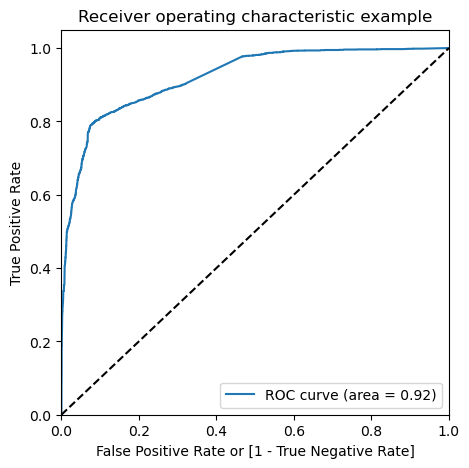

In [124]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The area under the ROC curve is 0.92. Hence, this is a good model.

#### Finding Optimal Cutoff Point

In [125]:
# creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.371031,3009,0,1,1,1,1,0,0,0,0,0,0
1,0,0.522636,1012,1,1,1,1,1,1,1,0,0,0,0
2,0,0.004997,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.806498,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.997109,7987,1,1,1,1,1,1,1,1,1,1,1


In [126]:
# calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.689970  0.979558  0.508579
0.2   0.2  0.704613  0.976697  0.534187
0.3   0.3  0.829318  0.849959  0.816389
0.4   0.4  0.865376  0.808667  0.900896
0.5   0.5  0.872146  0.785773  0.926248
0.6   0.6  0.855771  0.723630  0.938540
0.7   0.7  0.838136  0.650450  0.955698
0.8   0.8  0.807432  0.537612  0.976440
0.9   0.9  0.767911  0.412510  0.990525


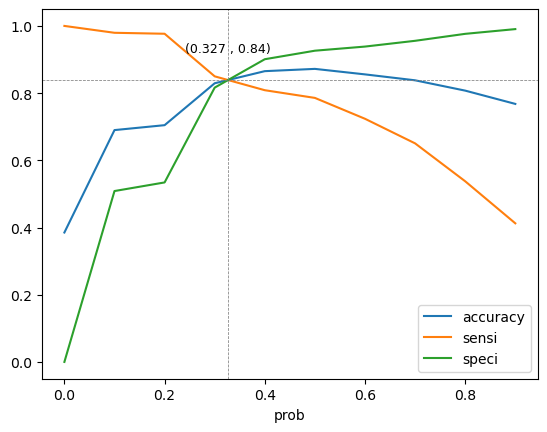

In [127]:
from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()

From the above graph a cut off point is 0.327

In [128]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.327 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.371031,3009,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.522636,1012,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.004997,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.806498,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.997109,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [129]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.371031,3009,1,37
1,0,0.522636,1012,1,52
2,0,0.004997,9226,0,0
3,1,0.806498,4750,1,81
4,1,0.997109,7987,1,100


In [130]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

1    2047
0     399
Name: final_Predicted, dtype: int64

In [131]:
# check the precentage of final_predicted conversions

2047/float(2047+399)

0.8368765331152903

In [132]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8428593922216974

In [133]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3306,  599],
       [ 399, 2047]], dtype=int64)

In [134]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [135]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8368765331152903

In [136]:
# Let us calculate specificity
TN / float(TN+FP)

0.846606914212548

# Inference:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.92, which is very good. We have the following values for the 
# Train Data:

# Accuracy : 84.29%
# Sensitivity :83.69%
# Specificity : 84.66%
# Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value, Negative Predictive Values, Precision & Recall.

In [137]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.15339308578745198


In [138]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7736205593348451


In [139]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8923076923076924


In [140]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3306,  599],
       [ 399, 2047]], dtype=int64)

In [141]:
##### Precision
TP / TP + FP

600.0

In [142]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8368765331152903

In [143]:
# importing precision recall curve from sklearn library
from sklearn.metrics import precision_recall_curve

In [144]:
# Creating precision recall curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

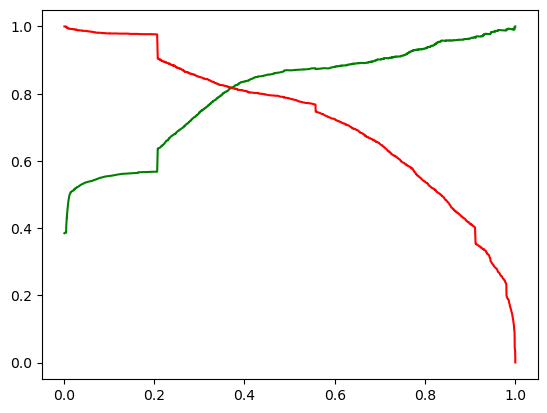

In [145]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [146]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3271,-0.292789,0.304501,-0.591008,0.998931,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1490,-0.292789,0.666261,1.894051,1.564920,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7936,-0.292789,-0.419021,-0.743117,-0.133048,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4216,-0.292789,-1.142542,-0.878732,-1.265027,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3830,-0.292789,1.751544,-0.578179,2.130909,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [147]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Specialization_Others,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Will revert after reading the email
3271,-0.591008,0,0,1,0,0,0,0,1
1490,1.894051,1,0,0,1,0,0,0,1
7936,-0.743117,0,0,1,0,0,0,0,1
4216,-0.878732,0,1,0,0,0,1,0,0
3830,-0.578179,1,0,0,0,0,0,0,1


In [148]:
X_test_sm = sm.add_constant(X_test)

In [149]:
X_test_sm.shape

(2723, 10)

In [150]:
y_test_pred = res.predict(X_test_sm)   

In [151]:
y_test_pred[:10]

3271    0.264557
1490    0.986676
7936    0.233740
4216    0.999650
3830    0.272720
1800    0.809977
6507    0.006698
4821    0.019829
4223    0.911605
4714    0.208444
dtype: float64

In [152]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [153]:
# Let's see the head
y_pred_1.head()

,0
3271,0.264557
1490,0.986676
7936,0.233740
4216,0.999650
3830,0.272720


In [154]:
# Let's see the head
y_pred_1.head()

,0
3271,0.264557
1490,0.986676
7936,0.233740
4216,0.999650
3830,0.272720


In [155]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [156]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [157]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [158]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [159]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.264557
1,1,1490,0.986676
2,0,7936,0.233740
3,1,4216,0.999650
4,0,3830,0.272720


In [160]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [161]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3271,0.264557
1,1,1490,0.986676
2,0,7936,0.233740
3,1,4216,0.999650
4,0,3830,0.272720


In [162]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [163]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,3271,0,0.264557,26
1,1490,1,0.986676,99
2,7936,0,0.233740,23
3,4216,1,0.999650,100
4,3830,0,0.272720,27


In [164]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [165]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

1    845
0    144
Name: final_Predicted, dtype: int64

In [166]:
# checking the precentage of final_predicted conversions on test data

865/float(865+177)

0.8301343570057581

In [167]:
#checking the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8251928020565553

In [168]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1402,  332],
       [ 144,  845]], dtype=int64)

In [169]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [170]:
#see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8543983822042467

In [171]:
# Let us calculate specificity
TN / float(TN+FP)

0.8085351787773933

Model :-Test data and the following results were obtained:

# - Accuracy: 82.51%
# - Sensitivity: 85.44%
# - Specificity: 80.85%

These results are similar to the results obtained on the training data, which suggests that the model is performing well.

The important features that contribute to the probability of a lead being converted are:

# - Lead Origin: Lead Add Form

# - What is your current occupation: Working Professional

# - Total Time Spent on Website: 

These features can be used to target marketing campaigns more effectively. For example, if a company is trying to sell a product or service to working professionals, they may want to focus their marketing efforts on leads that have those characteristics.

Here are some additional insights that can be gained from this information:

# - The model is more likely to correctly predict that a lead will convert if the lead came from the Lead Add Form.

# - The model is more likely to correctly predict that a lead will convert if the lead is a working professional.

# - The model is more likely to correctly predict that a lead will convert if the lead spent a longer time on the website.

